### 智慧文字辨識
先打開 GPU設定, 會快很多喔

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 


In [ ]:
!wget https://cdn2.ettoday.net/images/5050/5050914.jpg -O test.jpg

--2022-06-30 06:12:51--  https://cdn2.ettoday.net/images/5050/5050914.jpg
Resolving cdn2.ettoday.net (cdn2.ettoday.net)... 203.66.32.102, 61.221.82.14, 203.66.32.71, ...
Connecting to cdn2.ettoday.net (cdn2.ettoday.net)|203.66.32.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69733 (68K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  68.10K   321KB/s    in 0.2s    

2022-06-30 06:12:52 (321 KB/s) - ‘test.jpg’ saved [69733/69733]



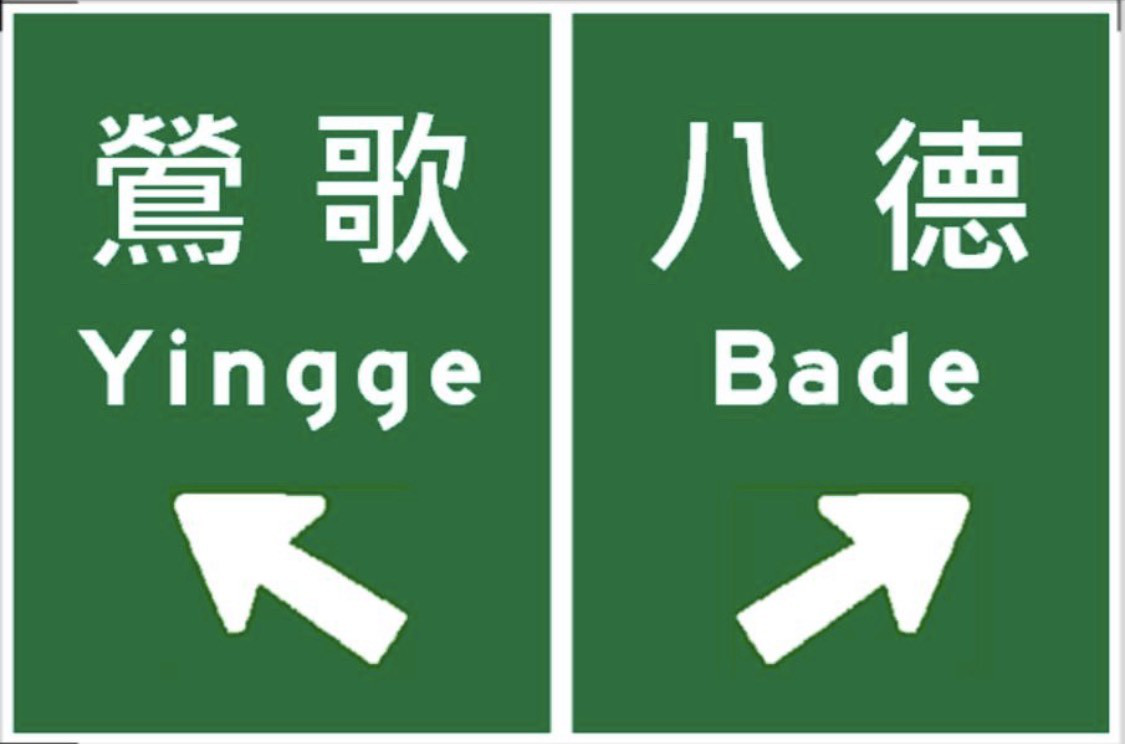

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("test.jpg")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ch_tra','en']) #ch_sim 與 ch_tra 太像不能共存

"""
其他語系

latin_lang_list = ['af','az','bs','cs','cy','da','de','en','es','et','fr','ga',\
                   'hr','hu','id','is','it','ku','la','lt','lv','mi','ms','mt',\
                   'nl','no','oc','pi','pl','pt','ro','rs_latin','sk','sl','sq',\
                   'sv','sw','tl','tr','uz','vi']
arabic_lang_list = ['ar','fa','ug','ur']
bengali_lang_list = ['bn','as','mni']
cyrillic_lang_list = ['ru','rs_cyrillic','be','bg','uk','mn','abq','ady','kbd',\
                      'ava','dar','inh','che','lbe','lez','tab','tjk']
devanagari_lang_list = ['hi','mr','ne','bh','mai','ang','bho','mah','sck','new',\
                        'gom','sa','bgc']
other_lang_list = ['th','ch_sim','ch_tra','ja','ko','ta','te','kn']
"""

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('test.jpg')
bounds

[([[78, 90], [490, 90], [490, 284], [78, 284]], '鶯 歌', 0.9788466180086587),
 ([[626, 100], [1045, 100], [1045, 289], [626, 289]],
  '八德',
  0.9914863694615381),
 ([[73, 312], [500, 312], [500, 452], [73, 452]],
  'Yingge',
  0.7909390279574707),
 ([[704, 316], [992, 316], [992, 420], [704, 420]], 'Bade', 0.999954104423523)]

In [ ]:
!wget -c https://files.cnblogs.com/files/xiaochina/simsun.zip
!unzip simsun.zip

--2022-06-30 06:21:15--  https://files.cnblogs.com/files/xiaochina/simsun.zip
Resolving files.cnblogs.com (files.cnblogs.com)... 47.110.20.149
Connecting to files.cnblogs.com (files.cnblogs.com)|47.110.20.149|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files-cdn.cnblogs.com/files/xiaochina/simsun.zip [following]
--2022-06-30 06:21:16--  https://files-cdn.cnblogs.com/files/xiaochina/simsun.zip
Resolving files-cdn.cnblogs.com (files-cdn.cnblogs.com)... 47.96.168.161
Connecting to files-cdn.cnblogs.com (files-cdn.cnblogs.com)|47.96.168.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9505845 (9.1M) [application/zip]
Saving to: ‘simsun.zip’

simsun.zip          100%[===================>]   9.07M  1019KB/s    in 9.7s    

2022-06-30 06:21:26 (953 KB/s) - ‘simsun.zip’ saved [9505845/9505845]

Archive:  simsun.zip
  inflating: simsun.ttc              


In [ ]:
!ls

sample_data  simsun.ttc  simsun.zip  test.jpg


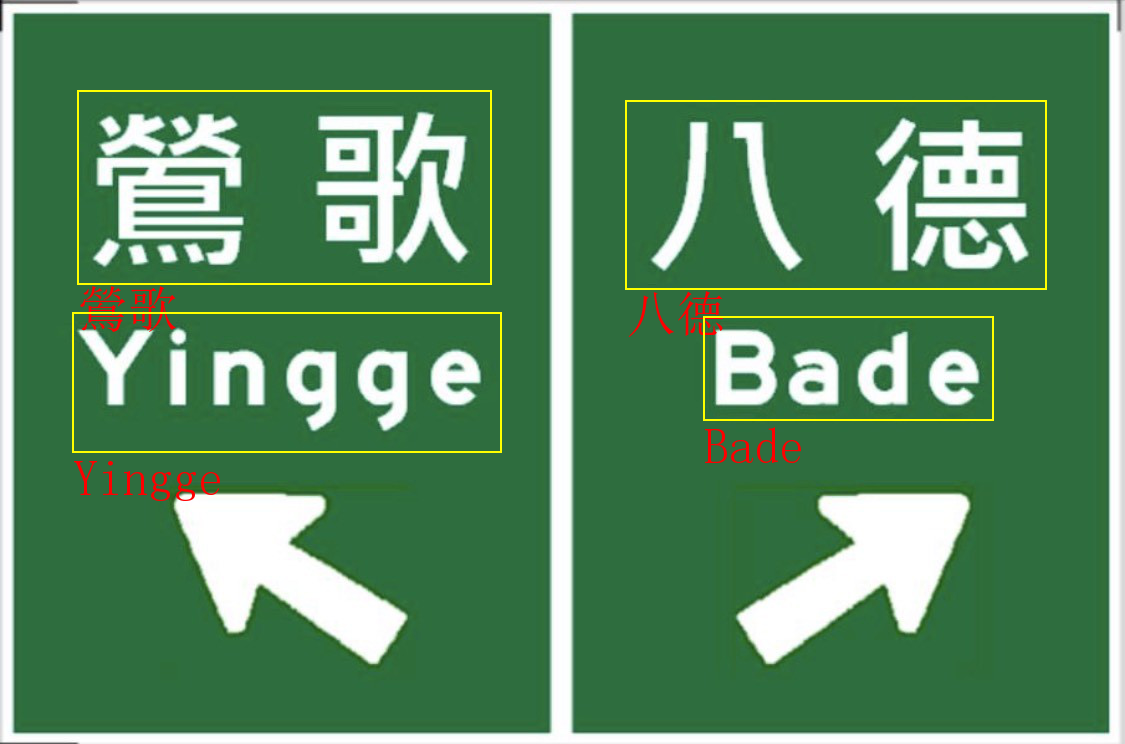

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    from PIL import ImageFont
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        # drawing text size 
        font = ImageFont.truetype("simsun.ttc", 50)
        #print(type(p3))
        #print(*p3)
        fx, fy=p3
        draw.text((fx,fy), bound[1].replace(" ",""),  font = font, align ="left", fill=(255, 0, 0))  #replace all space to none, color=R,G,B
    return image

draw_boxes(im, bounds)